## Appendix
PCA and clustering (k-means, Leiden, and hierarchical clustering) were performed on scRNA-seq data using BANKSY markers, with two feature selection strategies:  
- using markers alone  
- combining each marker with its top 25 most correlated genes (BANKSY method)  

All preprocessing steps follow those described in the BANKSY paper.  

In [63]:
from pathlib import Path

import sys
import os
sys.path.append(os.path.abspath("../src"))

import importlib
import utils
import plot

importlib.reload(utils)
importlib.reload(plot)

from utils import load_scRNA_data
from utils import process_related_genes, kmeans_clustering, leiden_clustering, hierarchical_clustering
from plot import plot_pca_variance_ratio, plot_pca_cumulative_variance
from plot import CM, SAVE_FIG

import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
fig_path = Path("../data/results/Appendix")

### data

#### Matched Single-Cell RNA Sequencing

In [ ]:
data_path = Path("../data/mouse_hypothalamus/singlecell/")
mtx_path = data_path / "GSE113576_matrix.mtx"
barcodes_path = data_path / "GSE113576_barcodes.tsv"
genes_path = data_path / "GSE113576_genes.tsv"
meta_path = data_path / "aau5324_Moffitt_Table-S1.xlsx"

In [ ]:
cell_class_dict = {
    'Mature oligodendrocyte': 'OD mature'
}

adata = load_scRNA_data(
    mtx_path, 
    barcodes_path, 
    genes_path, 
    meta_path, 
    cell_class_filter = cell_class_dict
)

#### Marker Genes

differentially expressed genes identified by BANKSY

In [ ]:
# all differentially expressed genes
DE_genes = ['Mlc1', 'Dgkk', 'Cbln2', 'Syt4', 'Gad1', 'Plin3', 'Gnrh1', 'Sln', 'Gjc3', 'Mbp', 'Lpar1', 'Trh', 'Ucn3', 'Cck']
# DE_genes_gm
DE_genes_MOD2 = ['Mlc1', 'Dgkk', 'Cbln2', 'Syt4', 'Gad1', 'Plin3', 'Gnrh1', 'Sln', 'Gjc3']
# DE_genes_wm
DE_genes_MOD1 = ['Mbp', 'Lpar1', 'Trh', 'Ucn3', 'Cck']

In [ ]:
sc_data = adata.to_df()
sc_DE_MOD2_df = sc_data[DE_genes_MOD2]
sc_DE_MOD1_df = sc_data[DE_genes_MOD1]
sc_DE = pd.concat([sc_DE_MOD2_df, sc_DE_MOD1_df], axis=1)

### BANKSY method: top 25 correlated genes for each marker

In [ ]:
top25_corr_genes = process_related_genes(DE_genes, sc_data.T)
print("number of unique correlated genes and DE genes: ", len(top25_corr_genes))

In [ ]:
DE_scRNA_data =  sc_data[DE_genes]
DE_corr_scRNA_data = sc_data[top25_corr_genes]
top25_num = len(top25_corr_genes)

### PCA

In [ ]:
data = DE_scRNA_data.copy()
data_corr = DE_corr_scRNA_data.copy()

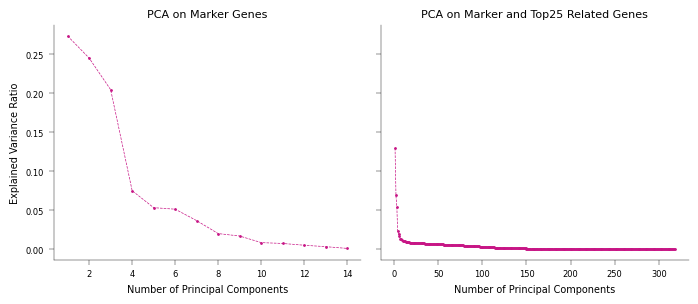

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(18*CM, 8*CM), sharey=True)

plot_pca_variance_ratio(data, n_components=14, title="PCA on Marker Genes", ax=ax[0])
plot_pca_variance_ratio(data_corr, n_components=top25_num, title="PCA on Marker and Top25 Related Genes", ax=ax[1], ylab=False)

plt.tight_layout()
plt.savefig(fig_path/"ExVar.pdf", **SAVE_FIG)
plt.show()

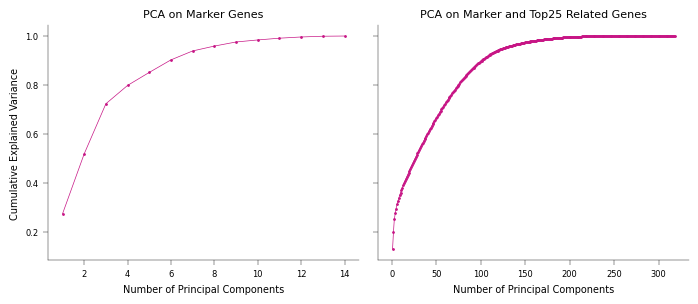

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(18*CM, 8*CM), sharey=True)

plot_pca_cumulative_variance(data, n_components=14, title="PCA on Marker Genes", ax=ax[0])
plot_pca_cumulative_variance(data_corr, n_components=top25_num, title="PCA on Marker and Top25 Related Genes", ax=ax[1], ylab=False)

plt.tight_layout()
plt.savefig(fig_path/"CuVar.pdf", **SAVE_FIG)
plt.show()

### k-means clustering

d:\miniconda\envs\ovrlpy\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\miniconda\envs\ovrlpy\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
d:\miniconda\envs\ovrlpy\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\miniconda\envs\ovrlpy\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


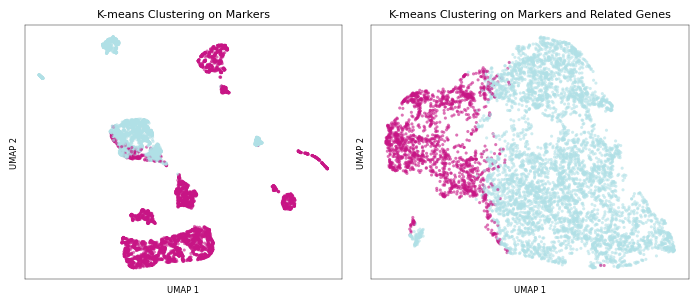

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(18*CM, 8*CM))

OD_k_labels, OD_centroids = kmeans_clustering(DE_scRNA_data, k=2, n_PCs=5, cmap_re=True, ax=ax[0], title="K-means Clustering on Markers")
OD_k_labels, OD_centroids = kmeans_clustering(DE_corr_scRNA_data, k=2, n_PCs=5, cmap_re=True, ax=ax[1], title="K-means Clustering on Markers and Related Genes")

plt.tight_layout()
plt.savefig(fig_path/"kmeans.pdf", **SAVE_FIG)
plt.show()

### leiden clustering

d:\miniconda\envs\ovrlpy\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\miniconda\envs\ovrlpy\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
d:\miniconda\envs\ovrlpy\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\miniconda\envs\ovrlpy\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


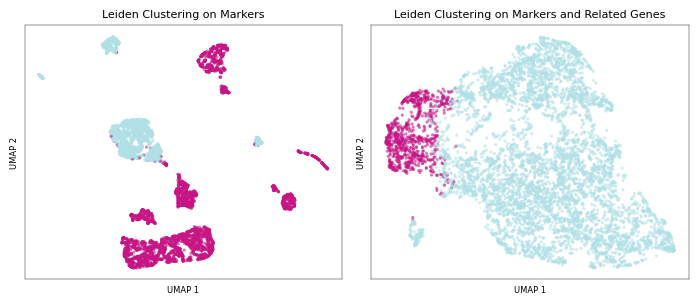

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(18*CM, 8*CM))

OD_leiden_labels = leiden_clustering(DE_scRNA_data, k=50, resolution=0.05, n_PCs=5, cmap_re=True, ax=ax[0], title="Leiden Clustering on Markers")
OD_leiden_labels = leiden_clustering(DE_corr_scRNA_data, k=50, resolution=0.2, n_PCs=5, ax=ax[1], title="Leiden Clustering on Markers and Related Genes")

plt.tight_layout()
plt.savefig(fig_path/"leiden.pdf", **SAVE_FIG)
plt.show()

### hierarchical clustering


d:\miniconda\envs\ovrlpy\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\miniconda\envs\ovrlpy\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
d:\miniconda\envs\ovrlpy\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\miniconda\envs\ovrlpy\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


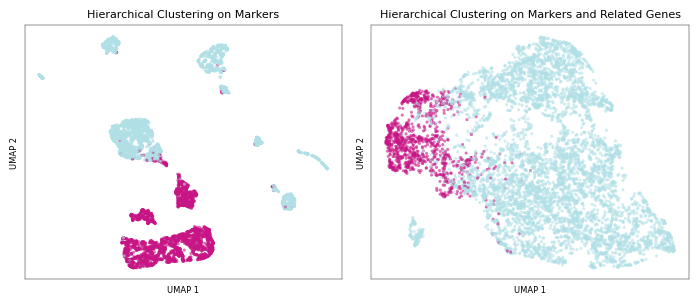

In [66]:
fig, ax = plt.subplots(1, 2, figsize=(18*CM, 8*CM))

OD_h_labels = hierarchical_clustering(DE_scRNA_data, k=2, n_PCs=5, ax=ax[0], title="Hierarchical Clustering on Markers")
OD_h_labels = hierarchical_clustering(DE_corr_scRNA_data, k=2, n_PCs=5, ax=ax[1], title="Hierarchical Clustering on Markers and Related Genes")

plt.tight_layout()
plt.savefig(fig_path/"hierarchical.pdf", **SAVE_FIG)
plt.show()